In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
scores = pd.read_csv('pd_data/judge_scores.csv')

In [46]:
scores_wc2018 = pd.read_csv('pd_data/judge_scores_wc2018.csv')

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
def is_gpf(segment_name):
    return 1 if segment_name.startswith('gpf') and not segment_name.startswith('gpfra') else 0
def is_ecfc(segment_name):
    return 1 if segment_name.startswith('ec') or segment_name.startswith('fc') else 0
def is_wc(segment_name):
    return 1 if segment_name.startswith('wc') else 0
def is_owg(segment_name):
    return 1 if segment_name.startswith('owg') else 0

In [16]:
goes = scores[scores.is_comp == 0]
comp = scores[scores.is_comp == 1]
comp = comp[comp.judge_score > 2.]
# comp['log_judge_score'] = comp.apply(lambda row: np.log(row.judge_score), axis=1)

In [65]:
all_scores = pd.concat([scores, scores_wc2018])
comp_all = scores[scores.is_comp == 1]
comp_all = comp_all[comp_all.judge_score > 2.]

In [57]:
comp_all['is2018'] = comp_all.apply(lambda row: 1 if row.season == 2018 else 0, axis=1)

In [67]:
competition_type = ols('judge_score ~ skater + judge + same_country + is_gpf + is_ecfc + is_wc + is_owg + season', data=comp_all).fit()

In [68]:
competition_type.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            judge_score   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1138.
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:13:10   Log-Likelihood:                -61685.
No. Observations:               97651   AIC:                         1.246e+05
Df Residuals:                   97059   BIC:                         1.302e+05
Df Model:                         591                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                               -389.3208      8.891    -43.787      0.000    -406.748    -371.894
skater[T.Adam RIPPON]                                      3.0780      0.052     59.051      0.000       2.976       3.180
skater[T.Adel TANKOVA / Ronald ZILBERBERG]                -0.3049      0.063     -4.844      0.000      -0.428      -0.182
skater[T.Adele MORRISON / Demid ROKACHEV]                 -1.0734      0.069    -15.564      0.000      -1.209      -0.938
skater[T.Aimee BUCHANAN]                                  -1.0007      0.069    -14.508      0.000      -1.136      -0.866
skater[T.Aiza MAMBEKOVA]                                  -0.1369      0.063     -2.174      0.030      -0.260      -0.013
skater[T.Alaine CHARTRAND]                                 1.6369      0.053     31.071      0.000       1.534       1.740
skater[T.Alena LEONOVA]                                    1.8137      0.056     32.192      0.000       1.703       1.924
skater[T.Alexa SCIMECA KNIERIM / Chris KNIERIM]            2.2647      0.053     42.392      0.000       2.160       2.369
skater[T.Alexander BOROVOJ]                               -0.3820      0.084     -4.534      0.000      -0.547      -0.217
skater[T.Alexander MAJOROV]                                1.5490      0.053     29.012      0.000       1.444       1.654
skater[T.Alexander MASZLJANKO]                            -0.3509      0.084     -4.156      0.000      -0.516      -0.185
skater[T.Alexander PETROV]                                 1.8097      0.056     32.136      0.000       1.699       1.920
skater[T.Alexander SAMARIN]                                2.1982      0.054     40.339      0.000       2.091       2.305
skater[T.Alexandra NAZAROVA / Maxim NIKITIN]               1.9995      0.053     37.607      0.000       1.895       2.104
skater[T.Alexandra PAUL / Mitchell ISLAM]                  2.0165      0.069     29.147      0.000       1.881       2.152
skater[T.Alexandra STEPANOVA / Ivan BUKIN]                 3.1843      0.052     60.900      0.000       3.082       3.287
skater[T.Alexei BYCHENKO]                                  2.3831      0.052     46.115      0.000       2.282       2.484
skater[T.Alexia PAGANINI]                                  0.5134      0.060      8.594      0.000       0.396       0.630
skater[T.Alicia PINEAULT]                                  0.8022      0.069     11.610      0.000       0.667       0.938
skater[T.Alina ZAGITOVA]                                   3.1250      0.053     58.539      0.000       3.020       3.230
skater[T.Alisa AGAFONOVA / Alper UCAR]                     1.6821      0.052     32.444      0.000       1.580       1.784
skater[T

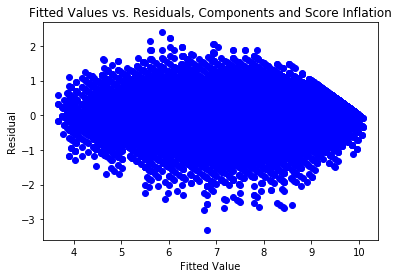

In [71]:
plt.plot(competition_type.fittedvalues, competition_type.resid, 'bo')
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.title('Fitted Values vs. Residuals, Components and Score Inflation')

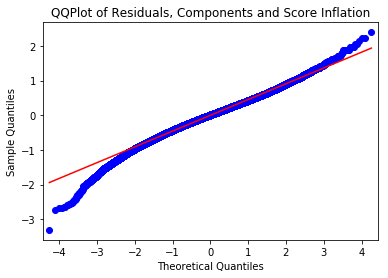

In [74]:
sm.qqplot(competition_type.resid, line='s')
plt.title('QQPlot of Residuals, Components and Score Inflation')

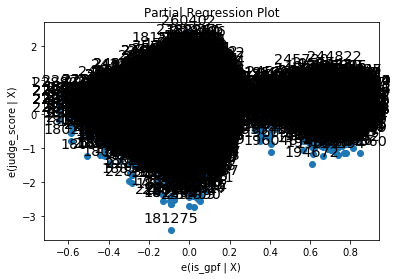

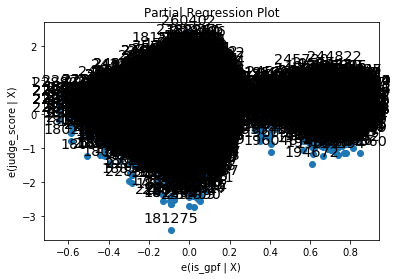

In [77]:
sm.graphics.plot_partregress('judge_score', 'is_gpf',
                             ['skater', 'judge', 'same_country', 'is_ecfc', 'is_owg', 'is_wc'],
                             data=comp_all)

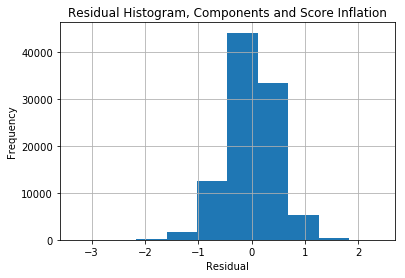

In [72]:
competition_type.resid.hist()
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram, Components and Score Inflation')

In [45]:
# [variance_inflation_factor(competition_type.model.exog, i) for i in xrange(competition_type.model.exog.shape[1])]

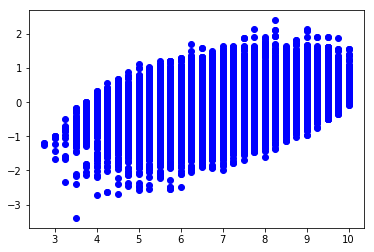

In [10]:
plt.plot(comp., competition_type.resid, 'bo')

In [ ]:
X = pd.concat([pd.get_dummies(comp.skater), comp.same_country])

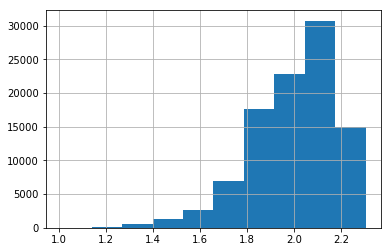

In [14]:
comp.log_judge_score.hist()

In [19]:
comp_skater_same_country = ols('judge_score ~ skater + same_country', data=comp).fit()
comp_skater_same_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            judge_score   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1703.
Date:                Thu, 22 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:56:27   Log-Likelihood:                -67755.
No. Observations:               97651   AIC:                         1.362e+05
Df Residuals:                   97307   BIC:                         1.395e+05
Df Model:                         343                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  5.6955      0.051    111.367      0.000       5.595       5.796
skater[T.Adam RIPPON]                                      2.8906      0.055     52.875      0.000       2.783       2.998
skater[T.Adel TANKOVA / Ronald ZILBERBERG]                -0.3553      0.066     -5.382      0.000      -0.485      -0.226
skater[T.Adele MORRISON / Demid ROKACHEV]                 -1.3500      0.072    -18.667      0.000      -1.492      -1.208
skater[T.Aimee BUCHANAN]                                  -1.1510      0.072    -15.915      0.000      -1.293      -1.009
skater[T.Aiza MAMBEKOVA]                                  -0.2454      0.066     -3.717      0.000      -0.375      -0.116
skater[T.Alaine CHARTRAND]                                 1.3569      0.055     24.567      0.000       1.249       1.465
skater[T.Alena LEONOVA]                                    1.6093      0.059     27.253      0.000       1.494       1.725
skater[T.Alexa SCIMECA KNIERIM / Chris KNIERIM]            2.1070      0.056     37.613      0.000       1.997       2.217
skater[T.Alexander BOROVOJ]                               -0.6399      0.089     -7.224      0.000      -0.814      -0.466
skater[T.Alexander MAJOROV]                                1.3357      0.056     23.844      0.000       1.226       1.446
skater[T.Alexander MASZLJANKO]                            -0.4232      0.089     -4.778      0.000      -0.597      -0.250
skater[T.Alexander PETROV]                                 1.4972      0.059     25.356      0.000       1.381       1.613
skater[T.Alexander SAMARIN]                                2.0333      0.057     35.563      0.000       1.921       2.145
skater[T.Alexandra NAZAROVA / Maxim NIKITIN]               1.8504      0.056     33.285      0.000       1.741       1.959
skater[T.Alexandra PAUL / Mitchell ISLAM]                  1.6417      0.072     22.700      0.000       1.500       1.783
skater[T.Alexandra STEPANOVA / Ivan BUKIN]                 2.9963      0.055     54.808      0.000       2.889       3.103
skater[T.Alexei BYCHENKO]                                  2.1994      0.054     40.549      0.000       2.093       2.306
skater[T.Alexia PAGANINI]                                  0.4860      0.063      7.760      0.000       0.363       0.609
skater[T.Alicia PINEAULT]                                  0.6278      0.072      8.681      0.000       0.486       0.770
skater[T.Alina ZAGITOVA]                                   3.0507      0.056     54.459      0.000       2.941       3.161
skater[T.Alisa AGAFONOVA / Alper UCAR]                     1.5169      0.054     27.966      0.000       1.411       1.623
skater[T

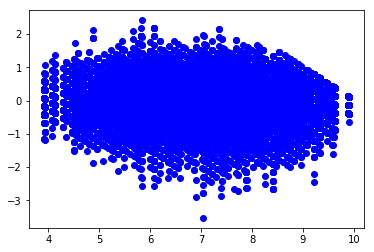

In [20]:
plt.plot(comp_skater_same_country.fittedvalues, comp_skater_same_country.resid, 'bo')

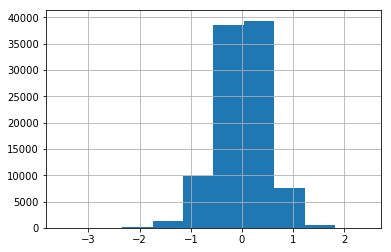

In [21]:
comp_skater_same_country.resid.hist()

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
for i in xrange(comp_skater_same_country.model.exog.shape[1]):
    print variance_inflation_factor(comp_skater_same_country.model.exog, i)
# [variance_inflation_factor(comp_skater_same_country.model.exog, i) for i in xrange(comp_skater_same_country.model.exog.shape[1])]

1085.17700741
7.94839305074
2.49664560544
1.9981567009
1.99830945824
2.4965438142
6.96129071899
3.98894020543
5.9723809523
1.49938517673
5.97247226849
1.49938517673
3.98894020543
4.98165269724
6.46705794335
1.9981567009
7.94840932701
8.933717118
2.99464179618
1.9981567009
5.97235812325
8.93366020392
1.9981567009
8.93366020392
2.99447010271
1.9981567009
3.49207285781
2.99447010271
5.97311148185
1.49938517673
1.9981567009
2.99447010271
1.9981567009
4.98160509269
3.98895291172
2.4967728445
9.91715683929
3.98925786271
3.98925786271
6.96139208748
1.9981567009
3.49195082105
2.99454641092
1.49930876284
1.99830945824
1.99819489024
2.99447010271
3.98894020543
5.47722301016
1.49938517673
1.9981567009
1.49930876284
8.93364123255
2.99447010271
7.94843645412
1.9981567009
2.99447010271
1.9981567009
2.98341009004
2.99447010271
7.948653471
4.48552756392
6.45623437306
1.9981567009
8.93375980357
7.45506958454
3.49231693134
2.99477533554
1.49938517673
1.49938517673
2.99448917976
3.98894020543
7.948523260

KeyboardInterrupt: 

In [ ]:
ols('judge_score ~ skater + same_country', data=goes).fit().summary()